->Table of Contents

-> Introduction:

Overview of the Titanic dataset and the objectives of the analysis.
Data Loading and Exploration

-> Data Loading: 

Reading the Titanic dataset into a Pandas DataFrame.
Initial Exploration: Inspecting the first few rows, summary statistics, and data types.
    
->Data Visualization:

Survival Count by Alive Status: Visualizing survival counts based on the alive status.
Age Group vs. Sex: Visualizing age distribution across different age groups and gender.
Age vs. Sex Distribution: Histogram and scatter plot of age distribution across gender.
Gender Distribution Pie Chart: Pie chart visualizing the distribution of males and females.
Age Distribution by Survival Status: Histogram of age distribution based on survival status.
Survival Status by Age Group: Bar plot visualizing survival status across age groups.
Scatter Plot of Survival by Age and Gender: Scatter plot showing survival status with age and gender.
Survival Status Distribution Pie Chart: Pie chart visualizing the survival status distribution.
    
-> Preprocessing

Handling Missing Values and Encoding: Filling missing values and encoding categorical variables.
    
Feature Scaling: Scaling numerical features for model training.
                                  
->Model Building

->Logistic Regression Model:
                                  
Splitting the data into training and testing sets.
                                  
Training the Logistic Regression model on the Titanic dataset.
                                  
Evaluating the model using accuracy score, confusion matrix, and classification report.
                                  


Libraries and Modules

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression as LOR
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')


__Data Loading and Exploration__
 
Loads the Titanic dataset into a Pandas DataFrame.

In [31]:
titanic_df = pd.read_csv('Titanic.csv')

Initial Exploration

-> Displays the first five rows

In [32]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


->Displays the last five rows

In [33]:
titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


->It is used to identify and count the number of missing (null) values in each column of the titanic_df DataFrame.

In [34]:
titanic_df.isnull().sum

<bound method DataFrame.sum of      survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  

Displays the statistics calculations of Dataset

In [35]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


->Displays the information about Database

In [36]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


2. Data Visualization

->Survival Count by Alive Status:

->Visualizes the count of survivors and non-survivors based on the 'alive' status.

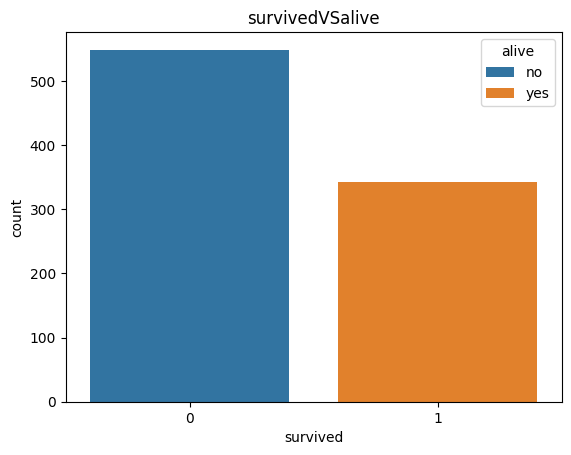

In [37]:
sns.countplot(x='survived',hue='alive', data=titanic_df, )
plt.title('survivedVSalive')
plt.show()


Age Group vs. Sex:

-> Visualizes the distribution of different age groups by gender.

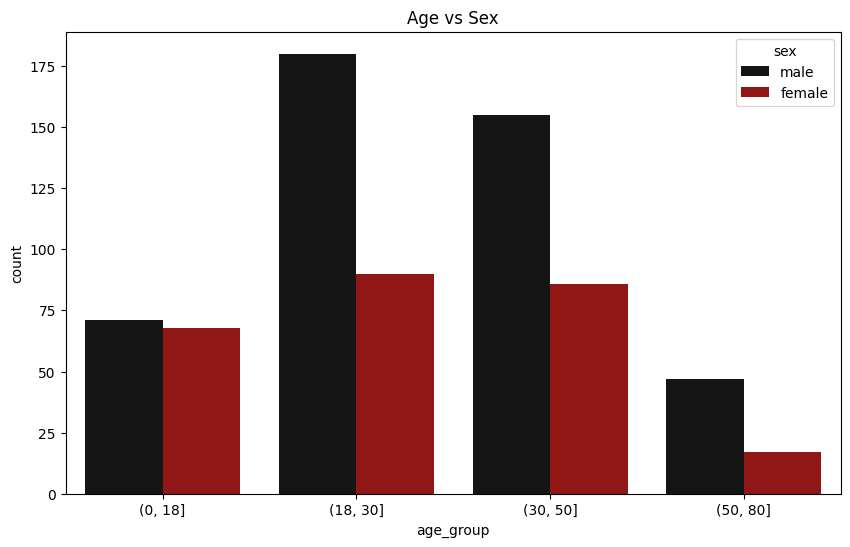

In [38]:

plt.figure(figsize=(10, 6))

custom_palette = {'male': '#151515', 'female': '#A50303'}

titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=[0, 18, 30, 50, 80])

sns.countplot(x='age_group', hue='sex', data=titanic_df, palette=custom_palette)

plt.title('Age vs Sex')
plt.show()


Age vs. Sex Distribution:

->Visualizes the age distribution by gender using a histogram.

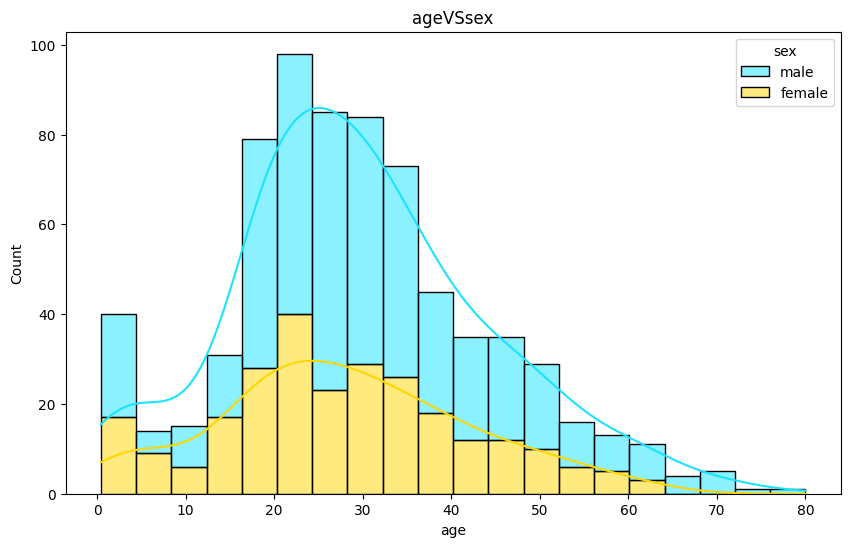

In [39]:
plt.figure(figsize=(10, 6))
custom_palette = {'male': '#19E4FF', 'female': '#FFD700'}
sns.histplot(data=titanic_df, x='age', hue='sex', multiple='stack', kde=True , bins=20,palette=custom_palette)
plt.title('ageVSsex')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

Scatter Plot:

->Scatter plot of age versus index, colored by gender.

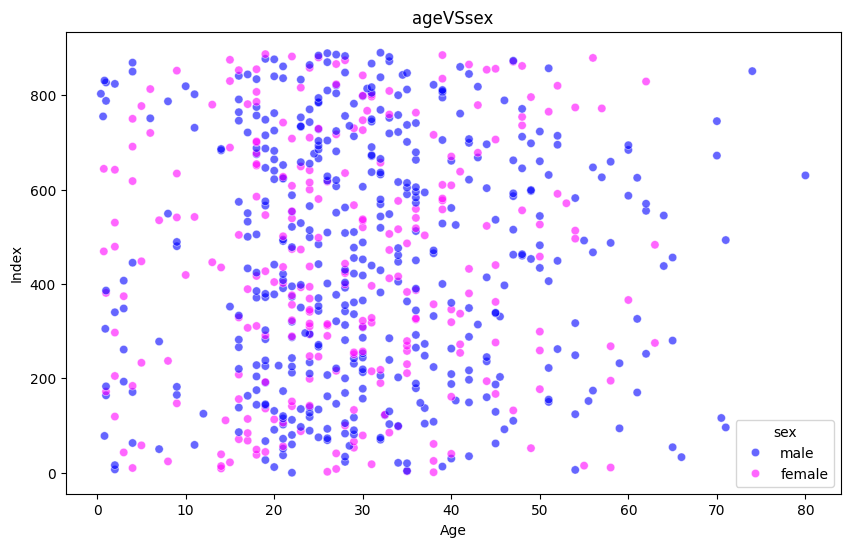

In [40]:

plt.figure(figsize=(10, 6))
col=['#FF0000','#008000','#FFA500','#0000FF','#FF00FF']
sns.scatterplot(x='age', y=titanic_df.index, hue='sex', data=titanic_df, palette=['#0000FF','#FF00FF'], alpha=0.6)
plt.title('ageVSsex')
plt.xlabel('Age')
plt.ylabel('Index')
plt.show()


Gender Distribution Pie Chart:

->Pie chart showing the distribution of males and females in the dataset.

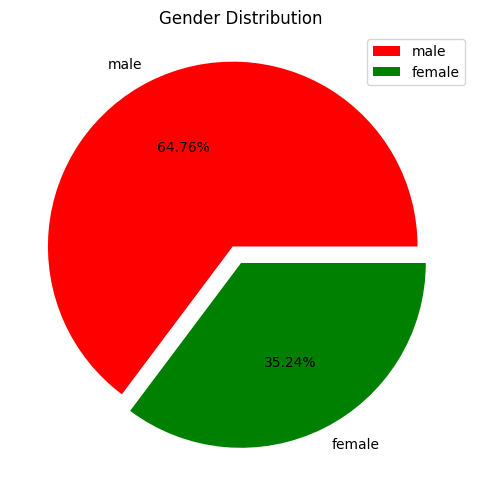

In [41]:
gender_counts = titanic_df['sex'].value_counts()
col=['#FF0000','#008000','#FFA500','#0000FF','#FF00FF']

explode = (0.1, 0) 

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%', colors=col, explode=explode)
plt.title('Gender Distribution')
plt.legend()
plt.show()

-> These two pie charts that display the age distribution of male and female passengers on the Titanic. 

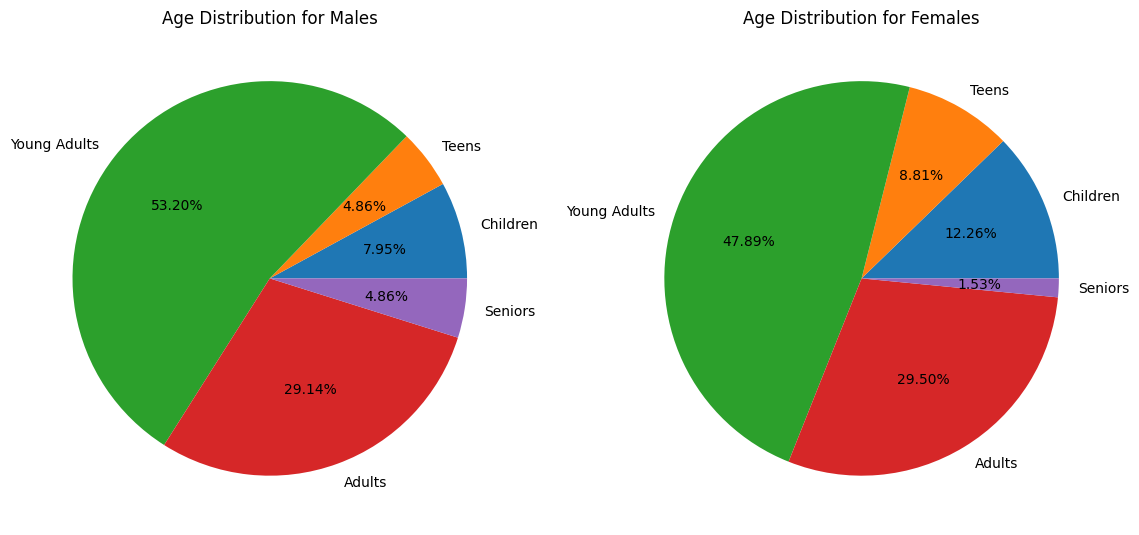

In [42]:

bins = [0, 12, 18, 35, 60, 100]
labels = ['Children', 'Teens', 'Young Adults', 'Adults', 'Seniors']

titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=bins, labels=labels, right=False)

age_gender_distribution = titanic_df.groupby(['sex', 'age_group']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(age_gender_distribution.loc['male'], labels=age_gender_distribution.columns, autopct='%.2f%%')
axes[0].set_title('Age Distribution for Males')

axes[1].pie(age_gender_distribution.loc['female'], labels=age_gender_distribution.columns, autopct='%.2f%%')
axes[1].set_title('Age Distribution for Females')

plt.show()


Age Distribution by Survival Status:

-> Histogram of age distribution based on survival status.

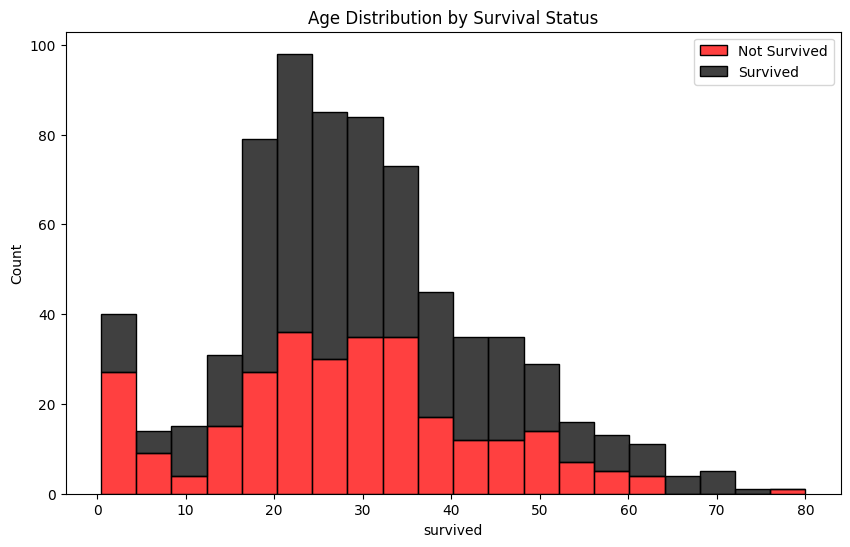

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='age', hue='survived', multiple='stack', kde=False, bins=20,palette=['#000000', '#FF0000'])
plt.title('Age Distribution by Survival Status')
plt.xlabel('survived')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


Age Distribution by Survival Status:

-> This bar plot visualizes the distribution of ages among Titanic passengers, segmented by their survival status.

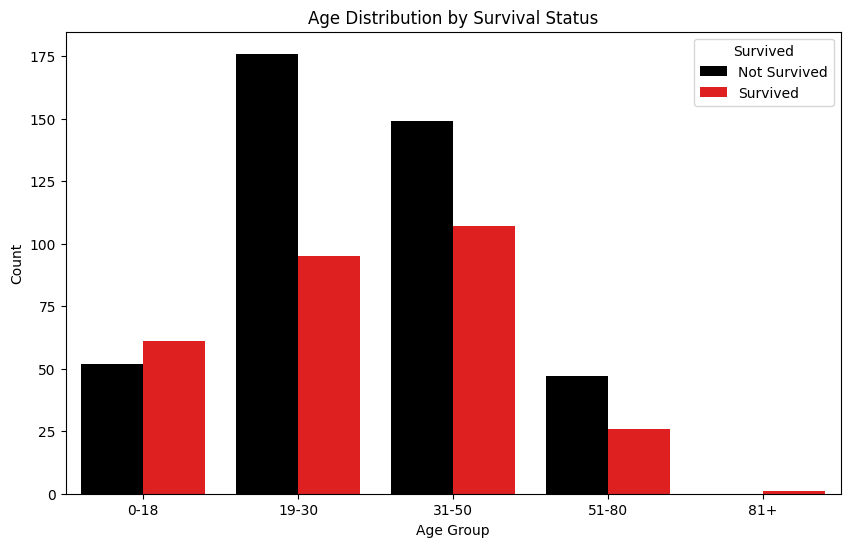

In [44]:
bins = [0, 18, 30, 50, 80, 100]
labels = ['0-18', '19-30', '31-50', '51-80', '81+']

titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))

sns.countplot(x='age_group', hue='survived', data=titanic_df, palette=['#000000', '#FF0000'])

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

Scatter Plot of Survival by Age and Gender:

-> Scatter plot showing survival status by age and gender.

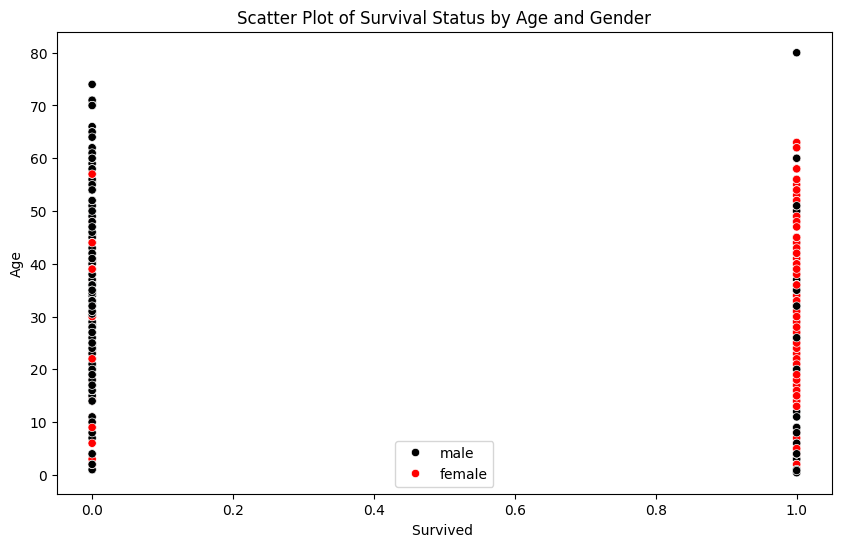

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='survived', y='age', hue='sex', data=titanic_df, palette=['#000000', '#FF0000'])
plt.title('Scatter Plot of Survival Status by Age and Gender')
plt.xlabel('Survived ')
plt.ylabel('Age')
plt.legend()
plt.show()

Survival Status Distribution Pie Chart:

->Pie chart visualizing the survival status distribution.

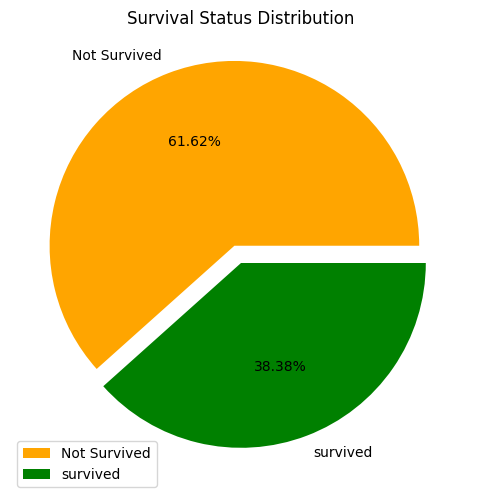

In [46]:
survival_counts = titanic_df['survived'].value_counts()
explode = (0.1, 0) 
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Not Survived', 'survived'], autopct='%.2f%%',  explode=explode, colors=['#FFA500','#008000'])
plt.title('Survival Status Distribution')
plt.legend()
plt.show()


-> Preprocessing

Handling Missing Values and Encoding:

Fills missing values in the age and fare columns with their respective medians.


In [47]:
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
titanic_df['fare'].fillna(titanic_df['fare'].median(), inplace=True)

-> Categorical Encoding:

Converts categorical columns (sex, embarked) into numerical format using one-hot encoding. The drop_first=True argument avoids multicollinearity by dropping the first category.

In [48]:
titanic_df = pd.get_dummies(titanic_df, columns=['sex', 'embarked'], drop_first=True)


-> Column Removal: Drops columns that are no longer needed (pclass, alive, alone).

In [49]:
titanic_df.drop(columns=['pclass', 'alive', 'alone'], inplace=True)

-> Survival Encoding: Encodes the survived column into numerical values (0 for non-survivors and 1 for survivors) using LabelEncoder.

In [50]:
L_C = LabelEncoder()
titanic_df['survived'] = L_C.fit_transform(titanic_df['survived'])

->Data Splitting and Model Training

Feature Selection:

Defines X as the features (age, fare) and Y as the target variable (survived).

Train-Test Split: 

Splits the data into training and testing sets (30% test data) using train_test_split.

Model Training:

Initializes and trains a KNN classifier with 4 neighbors.

In [51]:
X = titanic_df[['age', 'fare']]
Y = titanic_df['survived']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

->This commanddisplays the column names of the DataFrame titanic_df

In [53]:
titanic_df.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'class', 'who',
       'adult_male', 'deck', 'embark_town', 'age_group', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')

->Fit Logistic Regression Model and Predict

Model Initialization: Creates a Logistic Regression model with a maximum of 1000 iterations for convergence.
Model Training: Fits the model using the training features (X_train) and labels (Y_train).
Prediction: Uses the trained model to predict survival status for the test set (X_test).

In [54]:
model = LOR(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [55]:
Y_pred = model.predict(X_test)

->Create DataFrame for Predictions

This section creates a DataFrame to compare actual and predicted values:

DataFrame Creation: Copies the test features (X_test) and adds columns for actual values (Y_test) and predicted values (Y_pred).

Print Output: Displays the first few rows of the DataFrame to review the predictions.

In [56]:
DF_test_predict = X_test.copy()
DF_test_predict["Y_test"] = Y_test
DF_test_predict["Y_pred"] = Y_pred
print(DF_test_predict.head())


      age      fare  Y_test  Y_pred
558  39.0   79.6500       1       1
547  28.0   13.8625       1       0
494  21.0    8.0500       0       0
679  36.0  512.3292       1       1
7     2.0   21.0750       0       0


->Evaluation Metrics and Confusion Matrix

This section calculates and prints performance metrics for the model:

Confusion Matrix: Computes a confusion matrix to show the counts of true positive, true negative, false positive, and false negative predictions.

Accuracy Score: Measures the proportion of correctly predicted instances out of all predictions.

Precision Score: Measures the proportion of true positives among the positive predictions.

Recall Score: Measures the proportion of true positives among the actual positives.

F1 Score: Computes the harmonic mean of precision and recall, providing a balance between the two metrics.

In [57]:
CM = confusion_matrix(Y_test, Y_pred)
AS = accuracy_score(Y_test, Y_pred)
RS = recall_score(Y_test, Y_pred)
PS = precision_score(Y_test, Y_pred)
F1 = f1_score(Y_test, Y_pred)
print(f"Accuracy Score = {AS}\nPrecision Score = {PS}\nRecall Score = {RS}\nF1 Score = {F1}")


Accuracy Score = 0.6343283582089553
Precision Score = 0.6538461538461539
Recall Score = 0.16037735849056603
F1 Score = 0.25757575757575757


->Plot Confusion Matrix
This section visualizes the confusion matrix using a heatmap:

Heatmap Plot: Creates a heatmap of the confusion matrix (CM) with annotations for each cell.

Labels: Uses xticklabels and yticklabels to label the axes as "Did Not Survive" and "Survived".

Title and Labels: Adds title and axis labels to provide context for the plot.

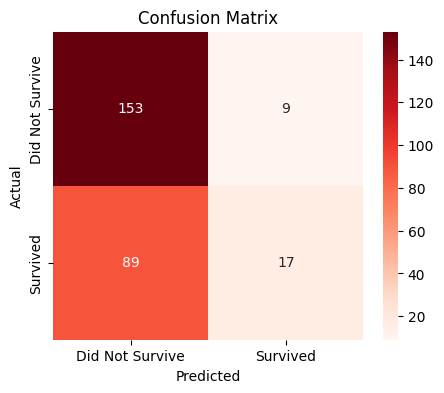

In [58]:
plt.figure(figsize=(5, 4))
sns.heatmap(CM, annot=True, fmt='d', cmap="Reds",
            xticklabels=["Did Not Survive", "Survived"],
            yticklabels=["Did Not Survive", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()